In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
db=pd.read_csv('fake_or_real_news.csv')

In [69]:
db

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [70]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [71]:
db.isnull().sum()

id       0
title    0
text     0
label    0
dtype: int64

In [72]:
db.nunique()

id       6335
title    6256
text     6060
label       2
dtype: int64

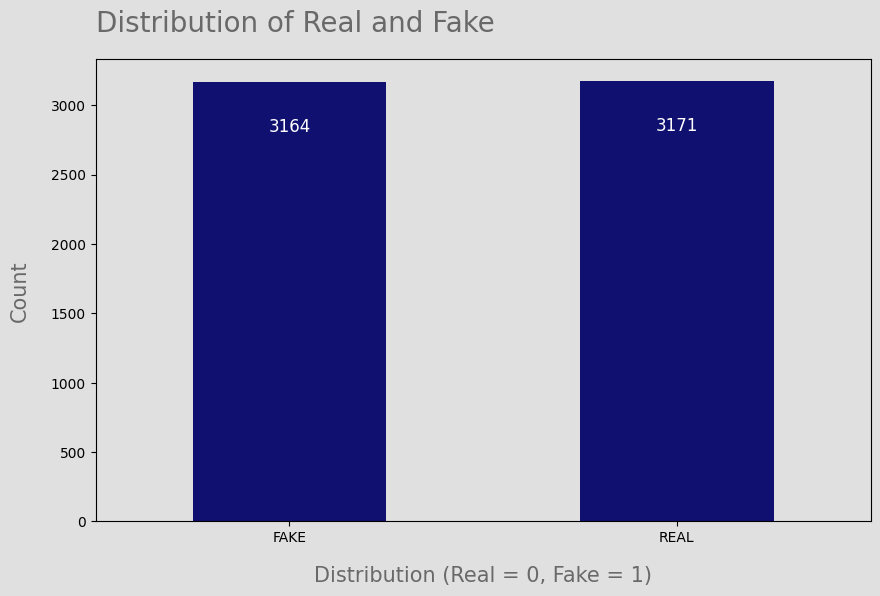

In [73]:
plt.figure(figsize=(10, 6))

count_plot = sns.countplot(
    x='label', 
    data=db,          
    color='#000080',
    width=0.5,
    legend=False
)

for p in count_plot.patches:
    count_plot.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height() * 0.1), 
        ha='center', 
        va='center', 
        xytext=(0, 0), 
        textcoords='offset points',
        color='white',
        fontsize=12
    )

plt.title('Distribution of Real and Fake', fontsize=20, loc='left', pad=20, color='#696969')
plt.xlabel('Distribution (Real = 0, Fake = 1)', fontsize=15, color='#696969', labelpad=15)
plt.ylabel('Count', fontsize=15, color='#696969', labelpad=15)

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0') 

plt.show()

In [74]:
db['fake'] = db['label'].apply(lambda x: 0 if x == 'REAL' else 1)

In [75]:
b = db.drop(['label'], axis=1)

In [76]:
x, y = db['text'], db['fake']

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [78]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

In [79]:
pac = PassiveAggressiveClassifier(max_iter=50, random_state=40)
pac.fit(tfidf_train,y_train)
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


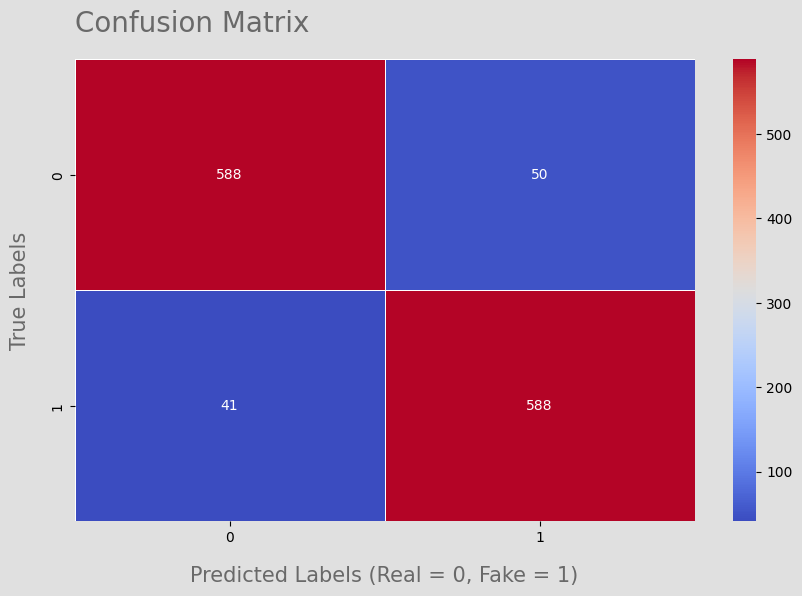

In [80]:
plt.figure(figsize=(10, 6))
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
sns.heatmap(cnf_matrix, annot=True, cmap='coolwarm', fmt='.5g', linewidths=0.5)

plt.title('Confusion Matrix', fontsize=20, loc='left', pad=20, color='#696969')
plt.xlabel('Predicted Labels (Real = 0, Fake = 1)', fontsize=15, color='#696969', labelpad=15)
plt.ylabel('True Labels', fontsize=15, color='#696969', labelpad=15)

plt.gca().set_facecolor('#E0E0E0')
plt.gcf().set_facecolor('#E0E0E0') 

# Conclusão

Durante o desenvolvimento, é possível observar que o **Passive Aggressive Classifier** apresentou um bom desempenho em precisão e recall. No entanto, o projeto possui algumas limitações, como a importância de um conjunto de dados equilibrado para evitar vieses no modelo.